In [2]:
from skimage.transform import resize
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import librosa
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image
import os
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout,BatchNormalization,Activation

In [5]:
import os
import cv2
import numpy as np


folders = ["C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Photos1/belly_pain",
           "C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Photos1/burping",
           "C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Photos1/discomfort",
           "C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Photos1/hungry",
           "C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Photos1/tired"
           ]




# Initialize an empty list to store processed images
train_images = []

# Iterate through each folder
for folder in folders:
    # List all files in the folder
    files = os.listdir(folder)

    # Iterate through each file
    for file in files:
        # Get the full file path
        file_path = os.path.join(folder, file)

        # Read the image
        img = cv2.imread(file_path)

        # Process the image (e.g., resize, normalize, etc.)
        processed_img = cv2.resize(img, (400,200))  #
        processed_img = processed_img / 255.0

        # Add processed image to the list
        train_images.append(processed_img)

# Convert the list of images to a numpy array
concatenated_images = np.array(train_images)

# Print the shape of concatenated images
print("Shape of concatenated images:", concatenated_images.shape)

Shape of concatenated images: (450, 200, 400, 3)


In [6]:
import tensorflow as tf
import numpy as np
num_classes = 5
labels = y = np.repeat([0,1,2,3,4],90)


y = tf.keras.utils.to_categorical(labels, num_classes)
print(y[90])

[0. 1. 0. 0. 0.]


In [44]:
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout,BatchNormalization,Activation, GlobalAveragePooling2D
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(200,400,3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(5, activation='softmax'))


# import tensorflow as tf
# from tensorflow.keras import layers, models

# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 400, 3)),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(128, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(5, activation='softmax')  
# ])

# model.add(Dense(100,input_shape=(200,400,3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###second layer
# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###third layer
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# ###final layer
# model.add(Dense(5))
# model.add(Activation('softmax'))


model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200, 400,3)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))



In [45]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(concatenated_images,y,epochs =10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2392 - loss: 59.1031
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 181s 12s/step - accuracy: 0.4159 - loss: 1.3839
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8945 - loss: 0.4400
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9895 - loss: 0.1182
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.9982 - loss: 0.0251
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 1.0000 - loss: 0.0086
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0055
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 1.0000 - loss: 0.0016
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 7.7780e-04
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 1.0000 - loss: 4.1665e-04


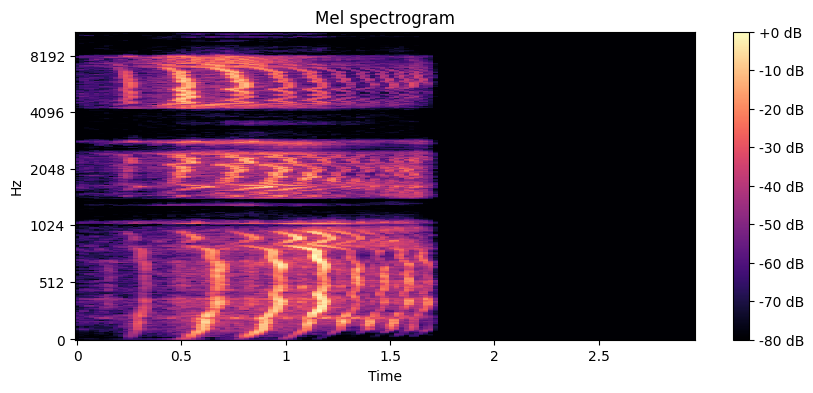

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted reason for baby crying: discomfort


In [47]:
def load_and_convert_to_spectrogram(audio_path, sr=44100):
    # Load audio file
    audio, sr = librosa.load(audio_path, sr=sr)

    # Convert the audio into a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram_db = np.transpose(spectrogram_db)

    return spectrogram_db

def predict_reason_for_crying(spectrogram):
    # Resize the spectrogram to match the model's input shape
    processed_img = cv2.resize(spectrogram, (400, 200))  # Resize to desired output size
    # Add channel dimension
    processed_img = np.expand_dims(processed_img, axis=-1)
    # Stack the image 3 times to match the model's input shape
    processed_img = np.concatenate([processed_img] * 3, axis=-1)
    # Normalize the image
    processed_img = processed_img / 255.0
    prediction = model.predict(np.array([processed_img]))
    class_labels = ['belly_pain','burping','discomfort','hungry','tired']
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

# Load audio and convert to spectrogram
#audio_path = 'C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data/hungry/3DF341FA-E90B-4335-A51A-A9B0769150CE-1436859328-1.1-m-04-hu.wav'
audio_path = "C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data/tired/d6cda191-4962-4308-9a36-46d5648a95ed-1431587899682-1.7-m-04-ti - Copy (3).wav"
spectrogram = load_and_convert_to_spectrogram(audio_path)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

# Predict the reason for baby crying
predicted_class = predict_reason_for_crying(spectrogram)
print("Predicted reason for baby crying:", predicted_class)

Recording audio...


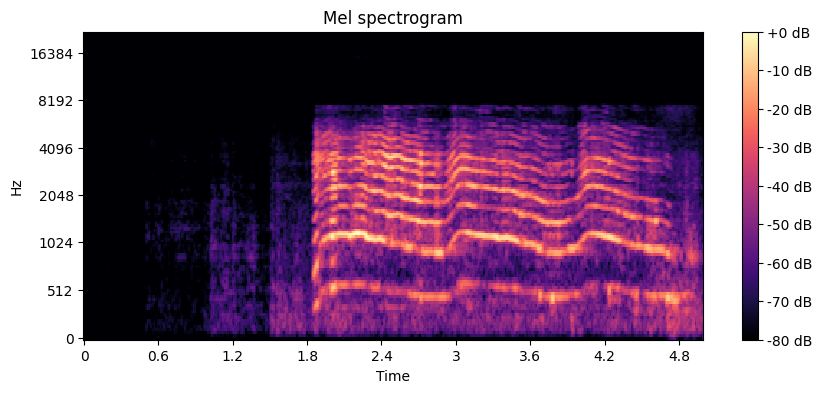

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted reason for baby crying: hungry


In [31]:
##live 
import pickle
import numpy as np
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd



# Function to record audio and return its spectrogram
def record_and_convert_to_spectrogram(duration=5, sr=44100):
    # Record audio
    print("Recording audio...")
    audio = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype='float32')
    sd.wait()  # Wait for recording to complete
    
    # Convert the audio into a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio[:, 0], sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    return spectrogram_db

# Function to predict the reason for baby crying based on spectrogram
def predict_reason_for_crying(spectrogram):
    # Resize the spectrogram to match the model's input shape
    processed_img = cv2.resize(spectrogram, (400, 200))  # Resize to desired output size
    # Add channel dimension
    processed_img = np.expand_dims(processed_img, axis=-1)
    # Stack the image 3 times to match the model's input shape
    processed_img = np.concatenate([processed_img] * 3, axis=-1)
    # Normalize the image
    processed_img = processed_img / 255.0
    prediction = model.predict(np.array([processed_img]))
    class_labels = ['belly_pain','burping','discomfort','hungry','tired']
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

# Record audio and convert to spectrogram
spectrogram = record_and_convert_to_spectrogram()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=44100, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

# Predict the reason for baby crying
predicted_class = predict_reason_for_crying(spectrogram)
print("Predicted reason for baby crying:", predicted_class)